# Project: Unlocking YouTube Channel Performance Secrets

##  This project analyzes key metrics related to YouTube channel performance, exploring trends in audience engagement, revenue metrics, and content effectiveness.

### Import modules

In [187]:

import numpy as np  #manipulating Numbers
import pandas as pd #Dataframes
import seaborn as sns   #Visualisation
import matplotlib.pyplot as plt #Visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




### Load & Explore The Data


In [188]:
data = pd.read_csv(r"C:\Users\thamm\OneDrive\Documents\Internship\Projects\Unlocking You Tube Channel Performance Secrets\youtube_channel_real_performance_analytics.csv")

In [189]:
#Analyze the data
df = pd.DataFrame(data)
df

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


In [190]:
#Dimension of data
df.shape

(364, 70)

In [191]:
#Basic information about the data
df.info

<bound method DataFrame.info of       ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0      0           201.0  2016-06-02 00:00:00                   0    2      6   
1      1           391.0  2016-06-10 00:00:00                   8   10      6   
2      2           133.0  2016-06-14 00:00:00                   4   14      6   
3      3            14.0  2016-06-29 00:00:00                  15   29      6   
4      4            45.0  2016-07-01 00:00:00                   2    1      7   
..   ...             ...                  ...                 ...  ...    ...   
359  359           779.0  2024-08-25 00:00:00                  10   25      8   
360  360           818.0  2024-09-01 00:00:00                   7    1      9   
361  361          2233.0  2024-09-16 00:00:00                  15   16      9   
362  362           391.0  2024-09-25 00:00:00                   9   25      9   
363  363          1875.0  2024-10-18 00:00:00                  23   18     10

In [192]:
#Rows
df.index

RangeIndex(start=0, stop=364, step=1)

In [193]:
#Columns Names
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [194]:
#Head of the data
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [195]:
#Tail of the data
df.tail()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29
363,363,1875.0,2024-10-18 00:00:00,23,18,10,2024,Friday,1.600,1791.0,...,0.0,0.0,40.26,755.0,3890.0,816.1554,-3.0,5.915,43431.0,6.67


In [196]:
#Check for datatypes
df.dtypes

ID                           int64
Video Duration             float64
Video Publish Time          object
Days Since Publish           int64
Day                          int64
                            ...   
Watch Time (hours)         float64
Subscribers                float64
Estimated Revenue (USD)    float64
Impressions                float64
Video Thumbnail CTR (%)    float64
Length: 70, dtype: object

## Data Cleaning and Preprocessing

### Handling Mixing Values

In [197]:
#Check for Null values
data.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [198]:
#Remove duplicates rows
data.drop_duplicates()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


In [199]:
# Fill or drop null values
data.dropna()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,779.0,2024-08-25 00:00:00,10,25,8,2024,Sunday,0.806,4104.0,...,0.0,0.0,50.82,396.0,10018.0,1104.5703,16.0,8.063,97065.0,8.23
360,360,818.0,2024-09-01 00:00:00,7,1,9,2024,Sunday,1.050,3273.0,...,0.0,0.0,42.05,344.0,8298.0,793.6508,7.0,8.705,65912.0,9.36
361,361,2233.0,2024-09-16 00:00:00,15,16,9,2024,Monday,1.161,3605.0,...,0.0,0.0,31.48,703.0,8487.0,1657.8232,14.0,9.852,76517.0,8.28
362,362,391.0,2024-09-25 00:00:00,9,25,9,2024,Wednesday,0.547,2338.0,...,0.0,0.0,62.38,244.0,7060.0,479.5583,11.0,3.858,67091.0,8.29


### Convert To DateTime Format

In [200]:
# Convert video Publish Time 
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])
df['Video Publish Time']

0     2016-06-02
1     2016-06-10
2     2016-06-14
3     2016-06-29
4     2016-07-01
         ...    
359   2024-08-25
360   2024-09-01
361   2024-09-16
362   2024-09-25
363   2024-10-18
Name: Video Publish Time, Length: 364, dtype: datetime64[ns]

## Exploratory Data Analysis (EDA)

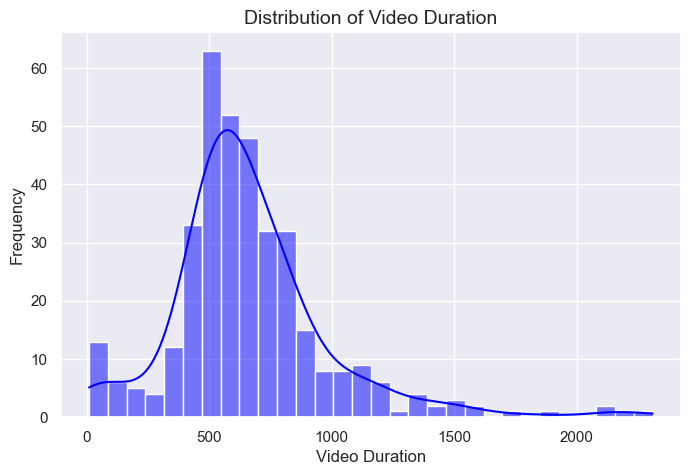

In [201]:
# Distribution of Video Duration
plt.figure(figsize=(8,5))
sns.histplot(data['Video Duration'], bins=30, color= 'blue', edgecolor='white', kde=True)
plt.title("Distribution of Video Duration", fontsize=14)
plt.xlabel=("Video Duration", "fontsize=12")
plt.ylabel("Frequency", fontsize=12)
plt.show()



### Analysis Relatinoship:

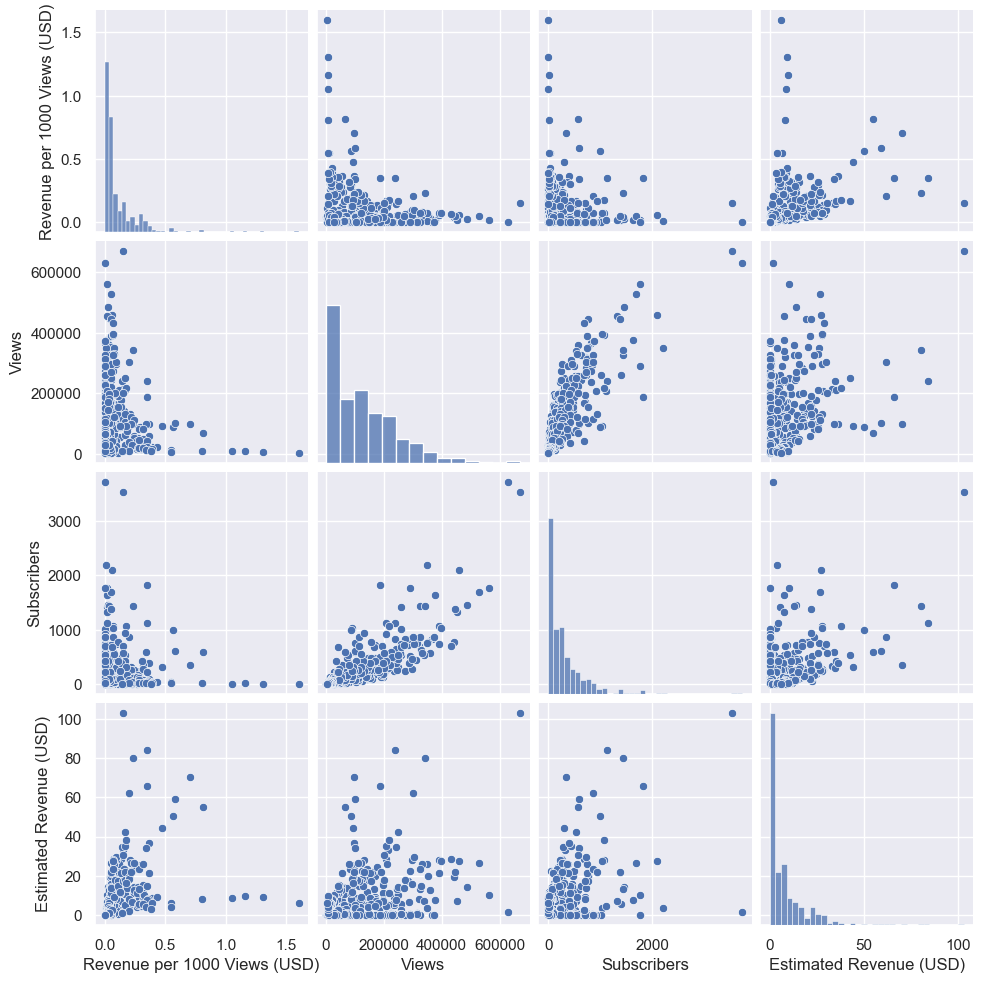

In [202]:
# Pairplot to visualize relationships
sns.pairplot(data[['Revenue per 1000 Views (USD)', 'Views', 'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

### Correlation Analysis:

In [203]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

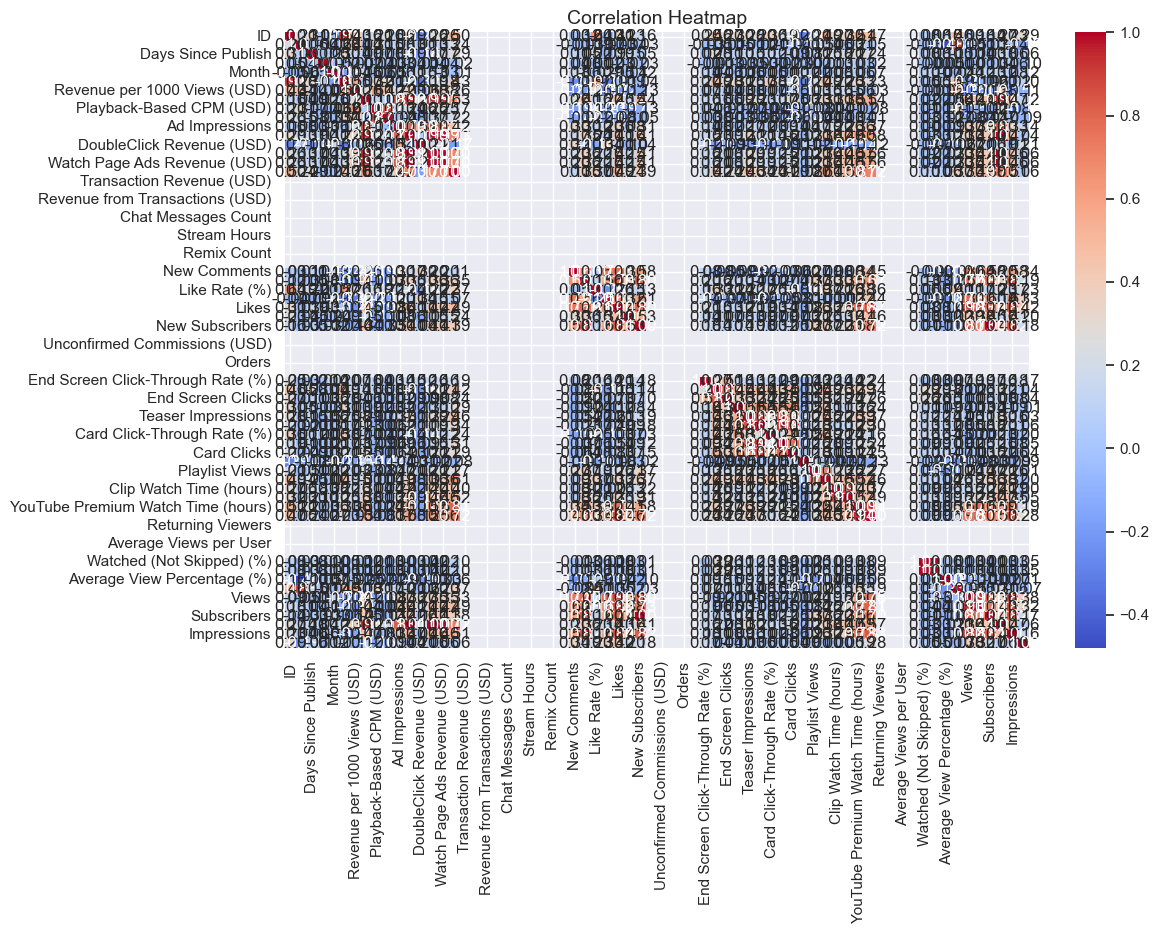

In [204]:
# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Top Performers by Revenue:

In [205]:
top_videos = data.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


## Feature Engineering

In [206]:
# Create revenue per view
data['Revenue per View'] = data['Estimated Revenue (USD)']/data['Views']
data['Revenue per View']

0      0.000024
1      0.000056
2      0.000014
3      0.000004
4      0.000000
         ...   
359    0.000805
360    0.001049
361    0.001161
362    0.000546
363    0.001521
Name: Revenue per View, Length: 364, dtype: float64

In [207]:
# Create engagement rate
data['Engagement Rate'] = (data['Likes'] + data['Shares'] + data['New Comments']) / data['Views'] * 100
data['Engagement Rate']

0      4.364455
1      3.153860
2      3.949293
3      5.434288
4      4.495532
         ...   
359    8.454781
360    7.724753
361    9.284789
362    7.577904
363    9.845758
Name: Engagement Rate, Length: 364, dtype: float64

## Data Visualization

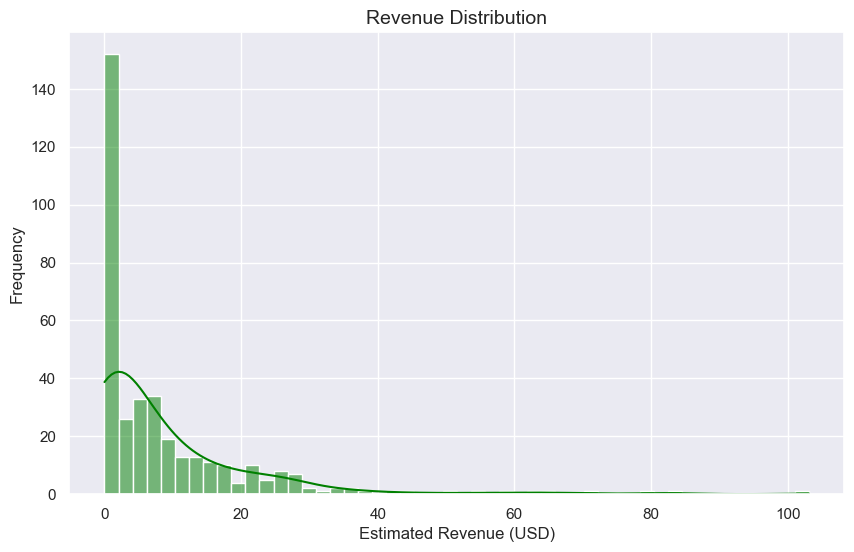

In [208]:
#Revenue Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Revenue Distribution", fontsize=14)
plt.xlabel=("Revenue (USD)", 'fontsize=12')
plt.ylabel("Frequency", fontsize=12)
plt.show()

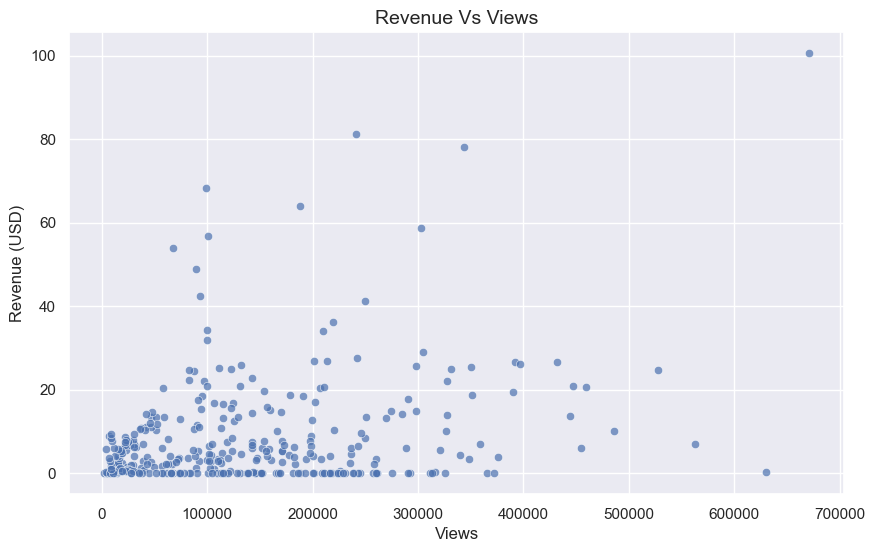

In [209]:
# Revenue Vs Views
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Views'], y=data['Estimated AdSense Revenue (USD)'], alpha=0.7)
plt.title('Revenue Vs Views', fontsize=14)
plt.xlabel=('Views','fontsize=12')
plt.ylabel('Revenue (USD)', fontsize=12)
plt.show()


## Predictive Model: Estimate Revenue

### Prepare Data

In [210]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X = data[features]
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
X_train.head()

,Views,Subscribers,Likes,Shares,New Comments,Engagement Rate
210,181294.0,402.0,8682.0,443.0,498.0,5.307953
339,30733.0,38.0,2267.0,48.0,105.0,7.874272
299,115321.0,175.0,5672.0,109.0,100.0,5.099678
75,17524.0,65.0,637.0,29.0,60.0,4.142890
84,30682.0,2.0,863.0,23.0,98.0,3.207092


In [212]:
X_test.head()

,Views,Subscribers,Likes,Shares,New Comments,Engagement Rate
193,73816.0,186.0,4949.0,136.0,693.0,7.827571
33,15329.0,46.0,706.0,11.0,143.0,5.610281
15,23999.0,47.0,736.0,17.0,60.0,3.387641
347,42212.0,215.0,1995.0,94.0,74.0,5.124135
57,92290.0,1040.0,2894.0,209.0,192.0,3.570268


In [213]:
y_train.head()

210     0.050
339     6.840
299    14.559
75      1.298
84      5.227
Name: Estimated Revenue (USD), dtype: float64

In [214]:
y_test.head()

193     0.000
33      1.063
15      0.723
347    14.953
57      3.567
Name: Estimated Revenue (USD), dtype: float64

### Train Random Forest Regressor:

In [216]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred

array([ 9.84094,  2.26001,  1.6979 , 10.05815, 17.34421,  9.78185,
        0.88528,  8.70682, 12.31788,  7.8314 ,  5.37407,  0.84694,
       10.73967,  1.67385,  6.64856, 17.63241,  2.51002,  3.36591,
        7.36498, 18.72365,  0.34165, 24.66753, 10.95469,  6.59723,
       10.14843, 26.72633,  6.81269, 12.21399,  2.02326,  2.23052,
        9.68335, 16.78327,  2.07929,  5.72839, 27.81797, 17.55691,
        0.81059,  1.64627,  7.83045,  3.77156, 18.39601,  4.53202,
        2.84179,  6.72232, 17.71107,  4.63446, 11.80163,  0.48949,
        0.54626,  1.96857, 15.45904,  3.86452, 20.73537,  5.99864,
       12.95955,  7.52469,  4.97479,  0.32348,  1.29366,  1.08382,
       16.23998, 16.95342,  2.94647,  1.80327,  9.13293,  1.11176,
        1.41919,  5.17432,  3.44339,  8.82152,  6.13839, 15.20794,
       21.32125])

### Evaluate the model:

In [217]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.70
R-squared: 0.13


## Insights and Recommendations

### Use visualizations and feature importance to derive insights:

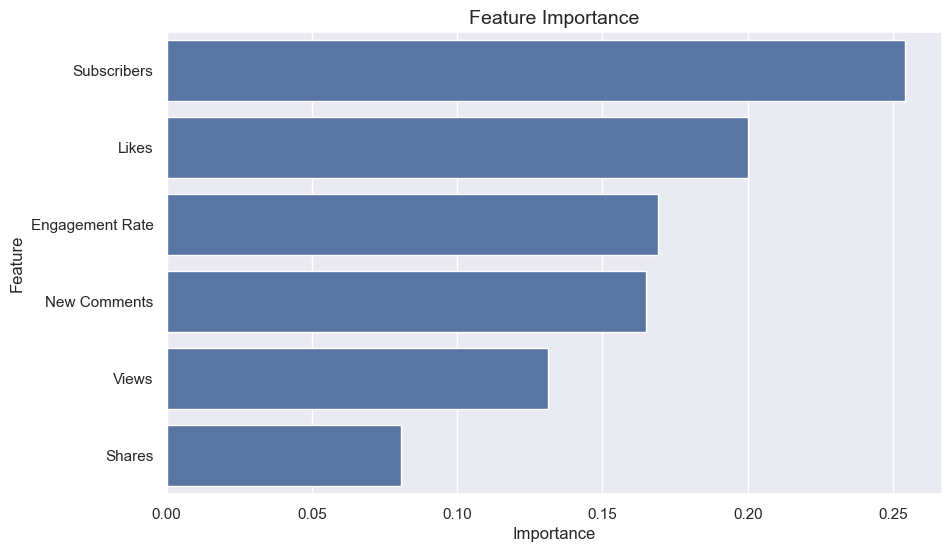

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance", fontsize=14)
plt.show()


## Deployment and Presentation

### Summarize findings:
○ Highlight top revenue drivers (e.g., views, engagement rate).
○ Identify underperforming areas (e.g., low CPM or low engagement).

In [226]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')


['youtube_revenue_predictor.pkl']